In [2]:
import numpy as np
from LogGabor import LogGabor
import cv2
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
#for each user separately
np.random.seed(4)

For now I'll be working on `cv2.getGaborKernel`, just to experiment on things but in future, maybe I'll shift to `LogGabor` as it offers more flexibility

In the paper, authors have used 24 different filters(4 scales $\times$ 6 orientations), by scale it meant the sixe of the fiter for example 3$\times$3, 4$\times$4, 28$\times$28, etc. and orientations mean the angle = [pi/4, pi/3, pi/2, pi]. I'll fill in on this as I understand more about the concept.

The filters are contsructed in terms of two components:
1. The radial component, which controls the frequency band to which the filter responds
2. The angular component, which controls the orientation of the filter

In [3]:
help(LogGabor)

Help on class LogGabor in module LogGabor.LogGabor:

class LogGabor(SLIP.SLIP.Image)
 |  LogGabor(pe)
 |  
 |  Defines a LogGabor framework by defining a ``loggabor`` function which return the envelope of a log-Gabor filter.
 |  
 |  Its envelope is equivalent to a log-normal probability distribution on the frequency axis, and von-mises on the radial axis.
 |  
 |  Method resolution order:
 |      LogGabor
 |      SLIP.SLIP.Image
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, pe)
 |      Initializes the Image class
 |      
 |      May take as input:
 |      
 |      - a dictionary containing parameters
 |      - a ``ndarray`` (dimensions ``N_X`` and ``N_Y`` are guessed from this array)
 |      - a string representing a file or URL pointing to an image file
 |      - a string pointing to  a file or URL containing a dictionary of parameters (or simply the name of the file)
 |      - a ``NeuroTools.parameters.ParameterSet`` object containing parameters
 | 

In [4]:
dir(LogGabor)

['FTfilter',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'argmax',
 'band',
 'dewhitening',
 'enveloppe_color',
 'extract_patches_2d',
 'fourier',
 'fourier_grid',
 'frequency_angle',
 'frequency_radius',
 'full_url',
 'get_imagelist',
 'get_pe',
 'get_size',
 'golden_pyramid',
 'hist_radial_frequency',
 'imread',
 'imshow',
 'init',
 'init_logging',
 'invert',
 'linear_pyramid',
 'list_database',
 'load_in_database',
 'loggabor',
 'loggabor_image',
 'low_pass',
 'make_imagelist',
 'mkdir',
 'normalize',
 'olshausen_whitening_filt',
 'orientation',
 'patch',
 'pipeline',
 'power_spectrum',
 'preprocess',
 'retina',
 'savefig',
 'set_size',
 'show_FT',
 'show_image_

In [5]:
help(cv2.getGaborKernel)

Help on built-in function getGaborKernel:

getGaborKernel(...)
    getGaborKernel(ksize, sigma, theta, lambd, gamma[, psi[, ktype]]) -> retval
    .   @brief Returns Gabor filter coefficients.
    .   
    .   For more details about gabor filter equations and parameters, see: [Gabor
    .   Filter](http://en.wikipedia.org/wiki/Gabor_filter).
    .   
    .   @param ksize Size of the filter returned.
    .   @param sigma Standard deviation of the gaussian envelope.
    .   @param theta Orientation of the normal to the parallel stripes of a Gabor function.
    .   @param lambd Wavelength of the sinusoidal factor.
    .   @param gamma Spatial aspect ratio.
    .   @param psi Phase offset.
    .   @param ktype Type of filter coefficients. It can be CV_32F or CV_64F .



In [6]:
ksize = 28
sigma = 8
theta = np.pi / 10
lambd = np.pi / 10
gamma = 0.5
phi = 0

In [7]:
log_gabor = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)

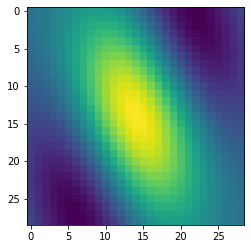

In [8]:
plt.imshow(log_gabor)

$ False\ acceptance\ ratio\ = \frac{impostor\ scores\ exceeding\ threshold}{all\ impostor\ scores} = \frac{falsly\ accepted}{all the accepted cases}$  <br>
$ False\ Rejection\ ratio = \frac{genuine\ scores\ falling\ below\ threshold}{all\ genuine\ scores} = \frac{flasly\ rejected}{all\ rejected\ cases}$

In [9]:
from pathlib import Path
from fastcore.imports import *
from fastai2.vision.all import *
import os
cwd = os.getcwd()
path = Path(cwd + '/CASIA-FaceV5-Crop/')

In [10]:
!tree -d {path}

/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop
├── 000
├── 001
├── 002
├── 003
├── 004
├── 005
├── 006
├── 007
├── 008
├── 009
├── 010
├── 011
├── 012
├── 013
├── 014
├── 015
├── 016
├── 017
├── 018
├── 019
├── 020
├── 021
├── 022
├── 023
├── 024
├── 025
├── 026
├── 027
├── 028
├── 029
├── 030
├── 031
├── 032
├── 033
├── 034
├── 035
├── 036
├── 037
├── 038
├── 039
├── 040
├── 041
├── 042
├── 043
├── 044
├── 045
├── 046
├── 047
├── 048
├── 049
├── 050
├── 051
├── 052
├── 053
├── 054
├── 055
├── 056
├── 057
├── 058
├── 059
├── 060
├── 061
├── 062
├── 063
├── 064
├── 065
├── 066
├── 067
├── 068
├── 069
├── 070
├── 071
├── 072
├── 073
├── 074
├── 075
├── 076
├── 077
├── 078
├── 079
├── 080
├── 081
├── 082
├── 083
├── 084
├── 085
├── 086
├── 087
├── 088
├── 089
├── 090
├── 091
├── 092
├── 093
├── 094
├── 095
├── 096
├── 097
├── 098
├── 099
├── 100
├── 101
├── 102
├── 103
├── 104
├── 105
├── 106
├── 107
├── 108
├── 109
├── 110
├── 111
├── 112
├── 113
├── 114
├── 115
├── 116
├── 1


500 directories


In [11]:
# lol = Path(str(path) + '/001/')

In [12]:
path_sample = path.ls()[0]
image_sample = path_sample.ls()[0]
from PIL import Image 
sample_img = Image.open(image_sample)

In [13]:
prime_folders = path.ls()[:10]
prime_folders

(#10) [Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/307'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/338'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/300'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/132'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/336'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/104'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/309'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/103'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/331')]

In [14]:
all_images = list()

for folders in prime_folders:
    for f in folders.ls():
        all_images.append(f)

In [15]:
L(all_images)

(#50) [Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_2.bmp'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_3.bmp'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_1.bmp'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_0.bmp'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/307/307_4.bmp'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/307/307_1.bmp'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/307/307_0.bmp'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/307/307_2.bmp'),Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/307/307_3.bmp')...]

In [16]:
pairs = list()

for image_i in all_images:
    for image_j in all_images:
        if(image_i != image_j):
            pairs.append([image_i, image_j])
            
    all_images.remove(image_i)

In [17]:
L(pairs)

(#925) [[Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp'), Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_2.bmp')],[Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp'), Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_3.bmp')],[Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp'), Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_1.bmp')],[Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp'), Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_0.bmp')],[Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp'), Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/307/307_4.bmp')],[Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp'), Path('/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/307/307_1.bmp')],[P

In [18]:
df = pd.DataFrame()

df['img_1'] = [pair[0] for pair in pairs]

df['img_2'] = [pair[1] for pair in pairs]

df['related'] = [1 if pair[0].parent.stem == pair[1].parent.stem else 0 for pair in pairs]

In [19]:
df.head()

,img_1,img_2,related
0,/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp,/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_2.bmp,1
1,/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp,/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_3.bmp,1
2,/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp,/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_1.bmp,1
3,/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp,/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_0.bmp,1
4,/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/135/135_4.bmp,/Users/jay.0tist/Documents/research/DRDO/CASIA-FaceV5-Crop/307/307_4.bmp,0


In [20]:
sample_img.shape

(152, 150)

In [21]:
sample_img = sample_img.resize((128,128))

In [22]:
# cv2.selectROI(sample_img_cv)

In [23]:
img_array = np.array(sample_img)[:, : , ::-1]
sample_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

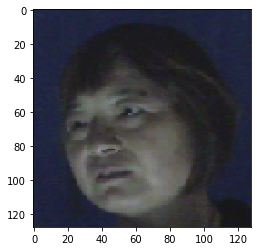

In [24]:
import matplotlib.pyplot as plt 

plt.imshow(sample_img)

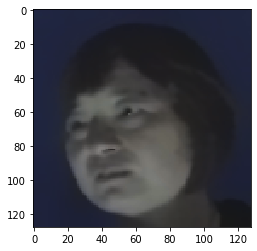

In [25]:
denoised = cv2.fastNlMeansDenoisingColored(sample_img,None,10,10,3,21)
plt.imshow(denoised)

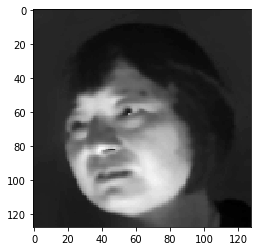

In [26]:
grayed = cv2.cvtColor(denoised,cv2.COLOR_RGB2GRAY)
plt.imshow(grayed, cmap='gray')

In [27]:
fft = np.fft.fft2(grayed)
fft_shift = np.fft.fftshift(fft)
iff_shift = np.fft.ifftshift(fft_shift)
ifft = np.fft.ifft2(iff_shift)

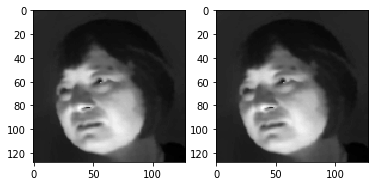

In [28]:
plt.subplot(1,2,1), plt.imshow(grayed, cmap='gray')
# plt.subplot(1,5,2), plt.imshow(np.log(1 + np.abs(fft)), cmap='gray')
# plt.subplot(1,5,3), plt.imshow(np.log(1 + np.abs(fft_shift)), cmap='gray')
# plt.subplot(1,5,4), plt.imshow(np.log(1 + np.abs.ifft_shift), cmap='gray')
plt.subplot(1,2,2), plt.imshow(np.abs(ifft), cmap='gray')

plt.show()

not much difference, eh ?

In [29]:
scales = [3, 5, 7, 9]
orientations = [np.pi, 5*np.pi/6, 4*np.pi/6, np.pi/2, np.pi/3, np.pi/6]
lambd = 3.
gamma = 0.55
sigma = 1.5

filters = list()

# σθ = 1.5, mult = 3
for ksize in scales:
    for theta in orientations:
        filters.append(cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma))

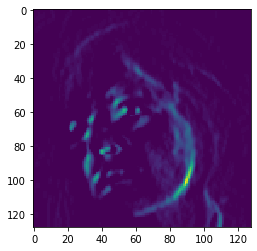

In [30]:
fimg = cv2.filter2D(grayed, cv2.CV_8UC1, filters[0])
plt.imshow(fimg)

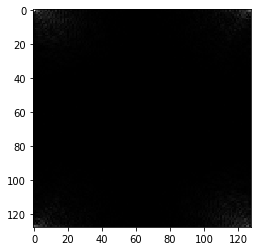

In [31]:
fimg_ifft_shift = np.fft.ifftshift(fimg)
fimg_ifft = np.fft.ifft2(fimg_ifft_shift)

plt.imshow(np.abs(fimg_ifft), cmap='gray')

In [32]:
# fimg = list()

# for fil in filters:
#     fimg.append(cv2.filter2D(grayed, cv2.CV_8UC1, fil))

In [33]:
image_vectors = list()

for fil in filters:
    img = cv2.filter2D(grayed, cv2.CV_8UC1, fil)
    img = img.reshape(-1)
    image_vectors.append(img)

In [ ]:
fv = np.array(image_vectors).reshape(-1)

fv = fv * 100

In [36]:
# I dont understand the user-specificty about the RG, but for now I think I'll use a random seed to specify each
# user, afterall each seed signifies a diff set of random numbers generated.

RG = np.random.randint(1, 255, fv.shape[0])

fs = fv + RG

In [37]:
fs

array([123, 175, 184, ..., 245, 159,  66])

In [38]:
RG

array([123, 175, 184, ...,  45,  59,  66])

In [39]:
fX = fs[:fs.shape[0]//2]
fY = fs[fs.shape[0]//2:]

fX, fY

(array([123, 175, 184, ..., 236, 200,  80]),
 array([234, 220, 165, ..., 245, 159,  66]))

In [40]:
K = np.random.uniform(-100, 100, fs.shape[0])

K0 = K[:K.shape[0]//2]
K1 = K[K.shape[0]//2:]
K0, K1

In [42]:
D = np.sqrt((fX - K0)**2 + (fY - K1)**2)
D

array([374.77693106, 377.60730982, 278.82176433, ..., 293.68495888,
       282.86879947, 125.35069286])

In [43]:
fft.shape

(128, 128)

In [44]:
def median_filter(array, fsize):
    a = np.zeros(D.shape[0] + 2 * (fsize//2))
    a[fsize//2: D.shape[0] + fsize//2] = array
    for i in range(fsize//2, D.shape[0] + fsize//2):
        fg = a[i-fsize//2: i+fsize//2+1]
        fg = sorted(fg)
        a[i] = fg[fsize//2]
        
    return a[fsize//2:  D.shape[0] + fsize//2 + 1]

In [45]:
Tf = median_filter(D, 5)
Tf

array([278.82176433, 278.82176433, 278.82176433, ..., 254.46943701,
       125.35069286,   0.        ])

In [46]:
scales = [3, 5, 7, 9]
orientations = [np.pi, 5*np.pi/6, 4*np.pi/6, np.pi/2, np.pi/3, np.pi/6]
lambd = 3.
gamma = 0.55
sigma = 1.5

def img_to_TF(src, filters, seed = 7, fsize=5):
    
    img = Image.open(src)
    img = img.resize((128, 128))
    img = np.array(img)[:, :, ::-1]
    denoised = cv2.fastNlMeansDenoisingColored(img,None,10,10,3,21)    
    gray = cv2.cvtColor(denoised, cv2.COLOR_RGB2GRAY)
            
    filtered_images = list()
    for f in filters:
        filtered_images.append(cv2.filter2D(gray, cv2.CV_8UC1, f))
        
    image_vectors = list()
    for img in filtered_images:
        fft = np.fft.fft2(img)
        fft_shift = np.fft.fftshift(fft)
        iff_shift = np.fft.ifftshift(fft_shift)
        ifft = np.fft.ifft2(iff_shift)
        image_vectors.append(ifft.reshape(-1))
        
    fv = np.array(image_vectors).reshape(-1) * 100
    np.random.seed(seed)
    RG = np.random.randint(1, 255, fv.shape[0])
    fs = fv + RG
    
    fX = fs[:fs.shape[0]//2]
    fY = fs[fs.shape[0]//2:]
    
    K = np.random.uniform(-100, 100, fs.shape[0])
    K0 = K[:K.shape[0]//2]
    K1 = K[K.shape[0]//2:]
    
    D = np.sqrt((fX - K0)**2 + (fY - K1)**2)
    Tf = median_filter(D, fsize)
    Tf = Tf.reshape(-1, 1)
    return Tf, RG, K

In [47]:
import os
cwd = os.getcwd()

In [48]:
get_mat_iqa = Path(cwd + '/performance_metric_EER/performance_metric_EER/fusion_iqa.mat')
get_mat_iqa

Path('/Users/jay.0tist/Documents/research/DRDO/performance_metric_EER/performance_metric_EER/fusion_iqa.mat')

In [51]:
# import scipy.io
# mat_iqa = scipy.io.loadmat(str(get_mat_iqa))

In [52]:
# mat_iqa

In [53]:
# mat_iqa['g'].shape, mat_iqa['im'].shape

In [54]:
# get_mat_no_iqa = Path(cwd + '/performance_metric_EER/performance_metric_EER/fusion_no_iqa.mat')
# get_mat_no_iqa

In [55]:
# mat_no_iqa = scipy.io.loadmat(str(get_mat_no_iqa))
# mat_no_iqa['g'].shape, mat_no_iqa['im'].shape

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

# !python3 -m pip install pyDML

from dml.kda import KDA

In [58]:
KDA??

In [58]:
# [img_to_TF(add, scales=scales, orientations=orientations, lambd=lambd, gamma=gamma, sigma=sigma) for add in df.img_1]

In [59]:
def get_tf(src):
    return img_to_TF(src, filters)

In [ ]:
cosine_similarity(get_tf(df.img_1[0])[0], get_tf(df.img_2[0])[0])

/Users/jay.0tist/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
get_tf(df.img_1[0])[0].reshape(-1, 1)

/Users/jay.0tist/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


array([[142.24108729],
       [142.24108729],
       [142.24108729],
       ...,
       [209.33500023],
       [209.33500023],
       [  0.        ]])

In [14]:
# mat_iqa, mat_no_iqa

({'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jan 13 18:20:43 2019',
  '__version__': '1.0',
  '__globals__': [],
  'g': array([[1.77378552, 2.03889369, 1.7750504 , 1.48810946, 2.03576919,
          1.62956017, 1.74720353, 2.08632951, 1.6907977 , 1.78294917,
          1.20435866, 2.18519927, 1.86308822, 1.57949223, 1.99487398,
          1.77597333, 2.04884129, 1.72514884, 2.26208751, 1.65828277,
          1.6810667 , 1.4401893 , 1.36664077, 1.286373  , 1.34932822,
          1.55830971, 1.68374002, 1.56046616, 2.3092922 , 1.89867853,
          1.77598796, 1.2917308 , 1.39741714, 1.61519901, 1.7639738 ,
          0.70876049, 1.7406529 , 1.31775967, 1.64555489, 1.79586479,
          1.92812954, 1.82852383, 1.87479578, 1.79158375, 2.22208133,
          2.31026146, 1.6708808 , 1.5823291 , 2.28297967, 1.89279993,
          1.52246987, 2.0257039 , 1.70161568, 1.67576733, 1.52629283,
          1.8162512 , 1.94031171, 1.23511743, 1.41630407, 1.79234232,
          1.8

In [3]:
import pandas as pd

In [57]:
df = pd.DataFrame()

In [58]:
df['g'] = [i for i in mat_iqa['g'].reshape(-1, 1)] + [i for i in mat_no_iqa['g'].reshape(-1, 1)]

In [59]:
df['label'] = [1 for i in range(mat_iqa['g'].reshape(-1, 1).shape[0])] + [0 for i in range(mat_no_iqa['g'].reshape(-1, 1).shape[0])]

In [60]:
df

,g,label
0,[1.7737855210434308],1
1,[2.038893689407437],1
2,[1.7750503962507882],1
3,[1.4881094639483856],1
4,[2.0357691890756717],1
...,...,...
195,[1.9604571525739534],0
196,[1.4362133432931468],0
197,[1.567639510213254],0
198,[1.4699789253124358],0


In [61]:
df.to_csv('g.csv')

In [62]:
DF = pd.DataFrame()

In [63]:
DF['im'] = [i for i in mat_iqa['im'].reshape(-1,1)] + [i for i in mat_no_iqa['im'].reshape(-1, 1)]
DF['label'] = [1 for i in mat_iqa['im'].reshape(-1, 1)] + [0 for i in mat_no_iqa['im'].reshape(-1, 1)]

In [64]:
DF

,im,label
0,[0.37959643536535936],1
1,[0.307758333667414],1
2,[1.0141682924485207],1
3,[0.6118586048276161],1
4,[0.8450452377597938],1
...,...,...
19795,[0.3270451632297114],0
19796,[0.33457013968752863],0
19797,[0.39504651123063106],0
19798,[0.4463072012403995],0


In [65]:
DF.to_csv('im.csv')

In [6]:
data_g = pd.read_csv('g.csv')
data_im = pd.read_csv('im.csv')

In [17]:
[float(i[1:-1]) for i in data_g.g]

[1.77378552,
 2.03889369,
 1.7750504,
 1.48810946,
 2.03576919,
 1.62956017,
 1.74720353,
 2.08632951,
 1.6907977,
 1.78294917,
 1.20435866,
 2.18519927,
 1.86308822,
 1.57949223,
 1.99487398,
 1.77597333,
 2.04884129,
 1.72514884,
 2.26208751,
 1.65828277,
 1.6810667,
 1.4401893,
 1.36664077,
 1.286373,
 1.34932822,
 1.55830971,
 1.68374002,
 1.56046616,
 2.3092922,
 1.89867853,
 1.77598796,
 1.2917308,
 1.39741714,
 1.61519901,
 1.7639738,
 0.70876049,
 1.7406529,
 1.31775967,
 1.64555489,
 1.79586479,
 1.92812954,
 1.82852383,
 1.87479578,
 1.79158375,
 2.22208133,
 2.31026146,
 1.6708808,
 1.5823291,
 2.28297967,
 1.89279993,
 1.52246987,
 2.0257039,
 1.70161568,
 1.67576733,
 1.52629283,
 1.8162512,
 1.94031171,
 1.23511743,
 1.41630407,
 1.79234232,
 1.86281896,
 1.51067273,
 1.85720176,
 2.15224607,
 1.78510664,
 1.72951613,
 1.56055973,
 1.98321784,
 1.26749633,
 1.98876766,
 1.91831767,
 1.60990765,
 1.54254092,
 1.96352008,
 1.20932093,
 1.82640727,
 1.41733526,
 1.90853786,


In [7]:
len(data_g)

200

In [8]:
data = pd.DataFrame()

In [18]:
data['scores'] = [float(i[1:-1]) for i in data_g.g] + [float(i[1:-1]) for i in data_im.im]
data['labels'] = [1 for i in range(len(data_g))] + [0 for i in range(len(data_im))]

In [19]:
data

,scores,labels
0,1.773786,1
1,2.038894,1
2,1.775050,1
3,1.488109,1
4,2.035769,1
...,...,...
19995,0.327045,0
19996,0.334570,0
19997,0.395047,0
19998,0.446307,0


In [20]:
data_cropped = data[:1000]

In [24]:
data.to_csv('data.csv')
data_cropped.to_csv('data_cropped.csv')

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_cropped.scores, data_cropped.labels, test_size=0.2, random_state=7)

In [26]:
import numpy as np
np.get_include()

'/Users/jay.0tist/Library/Python/3.7/lib/python/site-packages/numpy/core/include'

In [5]:
import pandas as pd
data = pd.read_csv('calculated.csv')
data_aux = pd.DataFrame()

In [6]:
data_aux['scores'] = [float(i[2:-2]) for i in data.scores]
data_aux['labels'] = [i for i in data.labels]

In [7]:
data_aux.to_csv('calculated.csv')